In [1]:
pip install qiskit qiskit-aer qiskit-machine-learning


In [2]:
pip install qiskit qiskit-aer qiskit-machine-learning numpy pandas scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score
from qiskit import Aer
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.algorithms import VQC



In [4]:
# Load the dataset
file_path = "tourism_dataset.csv"  # Make sure the file is in the same directory as your notebook
df = pd.read_csv(file_path)

# Display the first 5 rows of the dataset
df.head()



,Location,Country,Category,Visitors,Rating,Revenue,Accommodation_Available
0,kuBZRkVsAR,India,Nature,948853,1.32,84388.38,Yes
1,aHKUXhjzTo,USA,Historical,813627,2.01,802625.60,No
2,dlrdYtJFTA,Brazil,Nature,508673,1.42,338777.11,Yes
3,DxmlzdGkHK,Brazil,Historical,623329,1.09,295183.60,Yes
4,WJCCQlepnz,France,Cultural,124867,1.43,547893.24,No


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode target variable
df['Accommodation_Available'] = df['Accommodation_Available'].apply(lambda x: 1 if x == 'Yes' else 0)

# Drop irrelevant columns
df = df.drop(columns=['Location', 'Country'])

# Encode 'Category' as numerical using LabelEncoder
df['Category'] = LabelEncoder().fit_transform(df['Category'])

# Standardize numerical columns
scaler = StandardScaler()
df[['Visitors', 'Rating', 'Revenue']] = scaler.fit_transform(df[['Visitors', 'Rating', 'Revenue']])

# Display the first 5 rows after preprocessing
df.head()


,Category,Visitors,Rating,Revenue,Accommodation_Available
0,4,1.545549,-1.461521,-1.447726,1
1,3,1.078865,-0.864575,1.057293,0
2,4,0.026425,-1.375007,-0.560486,1
3,3,0.422119,-1.660503,-0.712529,1
4,2,-1.298144,-1.366355,0.168855,0


In [6]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['Accommodation_Available'])
y = df['Accommodation_Available']

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shape of training and testing data
X_train.shape, X_test.shape


((4791, 4), (1198, 4))

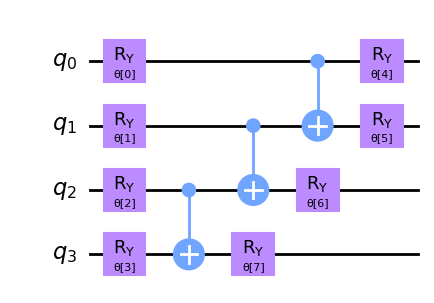

In [7]:
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit import Aer

# Define feature map and variational circuit
feature_map = ZZFeatureMap(feature_dimension=X_train.shape[1], reps=1)
var_circuit = RealAmplitudes(num_qubits=X_train.shape[1], reps=1)

# Use Aer simulator as backend
backend = Aer.get_backend('qasm_simulator')

# Visualize feature map and variational circuit
feature_map.decompose().draw('mpl')
var_circuit.decompose().draw('mpl')



In [8]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [9]:
from qiskit_machine_learning.algorithms import VQC

# Create Quantum Variational Classifier (VQC)
vqc = VQC(feature_map=feature_map, ansatz=var_circuit, backend=backend)

# Fit the model to training data
vqc.fit(X_train.to_numpy(), y_train.to_numpy())


TypeError: __init__() got an unexpected keyword argument 'backend'

In [ ]:
from qiskit_machine_learning.algorithms import VQC
from qiskit.utils import QuantumInstance

# Define the quantum instance
quantum_instance = QuantumInstance(backend, shots=1024)

# Create the VQC without 'backend' in constructor
vqc = VQC(feature_map=feature_map, ansatz=var_circuit, quantum_instance=quantum_instance)

# Fit the model to training data
vqc.fit(X_train.to_numpy(), y_train.to_numpy())


In [10]:
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms import VQC

# Define sampler (replaces backend)
sampler = Sampler()

# Create the VQC using sampler
vqc = VQC(feature_map=feature_map, ansatz=var_circuit, sampler=sampler)

# Fit the model to training data
vqc.fit(X_train.to_numpy(), y_train.to_numpy())


In [ ]:
# Measure reliability by running the model multiple times
reliability_scores = []
for _ in range(5):  # Run 5 times for reliability
    vqc.fit(X_train.to_numpy(), y_train.to_numpy())
    y_pred = vqc.predict(X_test.to_numpy())
    reliability_scores.append(accuracy_score(y_test, y_pred))

# Calculate average reliability
reliability = np.mean(reliability_scores)
print(f"✅ Reliability: {reliability:.2f}")


In [ ]:
import time

# Scalability: Data Size vs Accuracy and Time
data_sizes = [0.2, 0.4, 0.6, 0.8, 1.0]
accuracy_scores = []
time_taken = []

for size in data_sizes:
    X_sample, _, y_sample, _ = train_test_split(X, y, train_size=size, random_state=42)
    
    start_time = time.time()
    vqc.fit(X_sample.to_numpy(), y_sample.to_numpy())
    y_pred = vqc.predict(X_test.to_numpy())
    
    # Measure accuracy and time taken
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    time_taken.append(time.time() - start_time)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Make predictions on the test set
y_pred = vqc.predict(X_test.to_numpy())

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {accuracy:.2f}")
print(f"✅ Precision: {precision:.2f}")
print(f"✅ F1 Score: {f1:.2f}")


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Make predictions on the test set
y_pred = vqc.predict(X_test.to_numpy())

# Convert predictions and true labels to integers (if necessary)
y_pred = np.array(y_pred).astype(int)
y_test = y_test.astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"✅ Accuracy: {accuracy:.2f}")
print(f"✅ Precision: {precision:.2f}")
print(f"✅ F1 Score: {f1:.2f}")


In [ ]:
# Fit the model to training data again before prediction
vqc.fit(X_train.to_numpy(), y_train.to_numpy())
print("✅ Model successfully trained!")


In [ ]:
# Reduce training size to 10% of the original data for a quick check
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)

# Fit the model to the smaller dataset
vqc.fit(X_sample.to_numpy(), y_sample.to_numpy())

print("✅ Model successfully trained with reduced data!")


In [ ]:
# Check if model is fitted
try:
    vqc._check_fitted()  # Internal method to verify fitting
    print("✅ Model is properly fitted!")
except Exception as e:
    print(f"⚠️ Model is not yet fitted. Error: {e}")


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score
import numpy as np

# Make predictions on the test set
y_pred = vqc.predict(X_test.to_numpy())

# Convert predictions and true labels to integers
y_pred = np.array(y_pred).astype(int)
y_test = y_test.astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"✅ Accuracy: {accuracy:.2f}")
print(f"✅ Precision: {precision:.2f}")
print(f"✅ F1 Score: {f1:.2f}")


In [ ]:
import matplotlib.pyplot as plt

# Define metrics and their values
metrics = ['Accuracy', 'Precision', 'F1 Score']
values = [accuracy, precision, f1]

# Plot the metrics
plt.figure(figsize=(10, 6))
plt.plot(metrics, values, marker='o', linestyle='-', color='blue', label='Metrics Score')
plt.title('Performance Metrics for QLNN Model')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Scores range from 0 to 1
plt.grid(True)
plt.show()


In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Data sizes for evaluation
data_sizes = [0.2, 0.4, 0.6, 0.8, 1.0]
accuracy_scores = []

for size in data_sizes:
    # Split data with different sizes
    X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    # Fit the model to reduced size
    vqc.fit(X_sample.to_numpy(), y_sample.to_numpy())
    
    # Predict and calculate accuracy
    y_pred = vqc.predict(X_test.to_numpy())
    accuracy_scores.append(accuracy_score(y_test, np.array(y_pred).astype(int)))

# Plot Accuracy vs. Data Size
plt.figure(figsize=(10, 6))
plt.plot(data_sizes, accuracy_scores, marker='o', linestyle='-', color='blue', label='Accuracy')
plt.title('Accuracy vs. Data Size')
plt.xlabel('Data Size (%)')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Define different data sizes to test
data_sizes = [0.2, 0.4, 0.6, 0.8, 1.0]
accuracy_scores = []

# Use already trained model, do not retrain for each size
for size in data_sizes:
    # Reduce data size for evaluation
    X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    # Make predictions using the trained VQC model
    y_pred = vqc.predict(X_test.to_numpy())
    accuracy_scores.append(accuracy_score(y_test, np.array(y_pred).astype(int)))

# Plot Accuracy vs. Data Size
plt.figure(figsize=(10, 6))
plt.plot(data_sizes, accuracy_scores, marker='o', linestyle='-', color='blue', label='Accuracy')
plt.title('Accuracy vs. Data Size (Pre-trained Model)')
plt.xlabel('Data Size (%)')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Take a small sample from the test data
X_sample_test, _, y_sample_test, _ = train_test_split(X_test, y_test, test_size=0.1, random_state=42)

# Make predictions on the smaller test sample
y_pred_sample = vqc.predict(X_sample_test.to_numpy())

# Calculate accuracy only for this small test set
accuracy_sample = accuracy_score(y_sample_test.astype(int), np.array(y_pred_sample).astype(int))

print(f"✅ Accuracy for small sample: {accuracy_sample:.2f}")
